Import the master of `uproot4` to pick up recent fixes:

In [10]:
import uproot4 as uproot
import numpy as np
import awkward1 as ak
import matplotlib.pyplot as plt

Load `events` tree from file:

In [3]:
file = uproot.open("../data/test.root")
tree = file['events']

Access reco particles:

In [7]:
p_container = "ReconstructedParticles"
p = tree.arrays(filter_name=f"{p_container}/{p_container}*")#,how="zip")
ak.keys(p)

['ReconstructedParticles.type',
 'ReconstructedParticles.energy',
 'ReconstructedParticles.momentum.x',
 'ReconstructedParticles.momentum.y',
 'ReconstructedParticles.momentum.z',
 'ReconstructedParticles.referencePoint.x',
 'ReconstructedParticles.referencePoint.y',
 'ReconstructedParticles.referencePoint.z',
 'ReconstructedParticles.charge',
 'ReconstructedParticles.mass',
 'ReconstructedParticles.goodnessOfPID',
 'ReconstructedParticles.covMatrix[10]',
 'ReconstructedParticles.clusters_begin',
 'ReconstructedParticles.clusters_end',
 'ReconstructedParticles.tracks_begin',
 'ReconstructedParticles.tracks_end',
 'ReconstructedParticles.particles_begin',
 'ReconstructedParticles.particles_end',
 'ReconstructedParticles.particleIDs_begin',
 'ReconstructedParticles.particleIDs_end']

Calculate momentum, create a cut and apply it:

In [9]:
prefix = "momentum"
p[f'{p_container}.p'] = np.sqrt(p[f'{p_container}.{prefix}.x']**2 + p[f'{p_container}.{prefix}.y']**2 + p[f'{p_container}.{prefix}.z']**2)
p_cut = p[f'{p_container}.p'] > 2.
p = p[p_cut]

['ReconstructedParticles.type',
 'ReconstructedParticles.energy',
 'ReconstructedParticles.momentum.x',
 'ReconstructedParticles.momentum.y',
 'ReconstructedParticles.momentum.z',
 'ReconstructedParticles.referencePoint.x',
 'ReconstructedParticles.referencePoint.y',
 'ReconstructedParticles.referencePoint.z',
 'ReconstructedParticles.charge',
 'ReconstructedParticles.mass',
 'ReconstructedParticles.goodnessOfPID',
 'ReconstructedParticles.covMatrix[10]',
 'ReconstructedParticles.clusters_begin',
 'ReconstructedParticles.clusters_end',
 'ReconstructedParticles.tracks_begin',
 'ReconstructedParticles.tracks_end',
 'ReconstructedParticles.particles_begin',
 'ReconstructedParticles.particles_end',
 'ReconstructedParticles.particleIDs_begin',
 'ReconstructedParticles.particleIDs_end',
 'ReconstructedParticles.p']

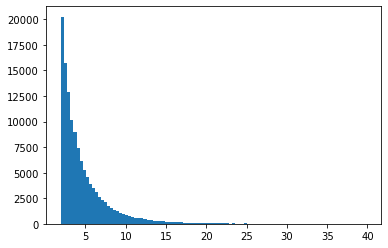

In [11]:
plt.hist(ak.flatten(p[f'{p_container}.p']),bins=100)
plt.show()